In [ ]:
%pip install wandb
%pip install wordcloud==1.8.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.4 MB/s 
     |████████████████████████████████| 147 kB 44.9 MB/s 
     |████████████████████████████████| 181 kB 51.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=5b58dd1f94eef3a61f32fe92610304c17be2ba548400d3d594417ec17594fb3d
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 5.2 MB/s 
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import plotly.express as px
import os
import gc
import wandb
import time
import random
import math
import glob
from scipy import spatial
from tqdm import tqdm
import warnings
import cv2
import pandas as pd
import numpy as np
from numpy import dot, sqrt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import plotly.graph_objects as go
from PIL import Image

In [ ]:
# customers = pd.read_csv('drive/MyDrive/Doutorado/Disciplinas/Visualização de Informação/Trabalho Final/data/customers.csv')
# articles = pd.read_csv('drive/MyDrive/Doutorado/Disciplinas/Visualização de Informação/Trabalho Final/data/articles.csv')
# transactions = pd.read_csv('drive/MyDrive/Doutorado/Disciplinas/Visualização de Informação/Trabalho Final/data/transactions_train.csv')

df_customers = pd.read_csv('drive/MyDrive/MECAI/MAI5017/data/customers.csv')
df_articles = pd.read_csv('drive/MyDrive/MECAI/MAI5017/data/articles.csv')
df_transactions = pd.read_csv('drive/MyDrive/MECAI/MAI5017/data/transactions_train.csv')

In [ ]:
df_customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [ ]:
df_transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [ ]:
df_articles[df_articles.columns[:15]].head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  \
0                     Solid                  9             Black   
1                     Solid                 10             White   
2                    Stripe                 11         Off White   
3                     Solid                  9             Black   
4                     Solid                 10             White   

   perceived_colour_value_id perceived_colour_value_name  \
0                          4                        Dark   
1                          3                       Light   
2                          1                 Dusty Light   
3                          4                        Dark   
4                          3                       Light   

   perceived_colour_master_id perceived_colour_master_name  department_no  
0                           5                        Black           1676  
1                           9                        White           1676  
2                           9                        White           1676  
3                           5                        Black           1339  
4                           9                        White           1339

In [ ]:
df_articles[df_articles.columns[15:]].head()

department_name index_code        index_name  index_group_no  \
0    Jersey Basic          A        Ladieswear               1   
1    Jersey Basic          A        Ladieswear               1   
2    Jersey Basic          A        Ladieswear               1   
3  Clean Lingerie          B  Lingeries/Tights               1   
4  Clean Lingerie          B  Lingeries/Tights               1   

  index_group_name  section_no            section_name  garment_group_no  \
0       Ladieswear          16  Womens Everyday Basics              1002   
1       Ladieswear          16  Womens Everyday Basics              1002   
2       Ladieswear          16  Womens Everyday Basics              1002   
3       Ladieswear          61         Womens Lingerie              1017   
4       Ladieswear          61         Womens Lingerie              1017   

  garment_group_name                                        detail_desc  
0       Jersey Basic            Jersey top with narrow shoulder straps.  
1       Jersey Basic            Jersey top with narrow shoulder straps.  
2       Jersey Basic            Jersey top with narrow shoulder straps.  
3  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...

In [ ]:
df_articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'

In [ ]:
# Replace missing values
df_articles.fillna(value="No Description", inplace=True)

# Adjust the article ID and product code to be string & add "0"
# df_articles["article_id"] = df_articles["article_id"].apply(lambda x: adjust_id(x))
# df_articles["product_code"] = df_articles["article_id"].apply(lambda x: x[:3])

# Wordcloud

In [ ]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    '''Creates a custom function for the color of the wordcloud.'''
    
    h = 60 # 0 - 360 <- the color hue
    s = 70 # 0-100 <- the color saturation
    l = random_state.randint(30, 70) # 0 - 100 <- gradient
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

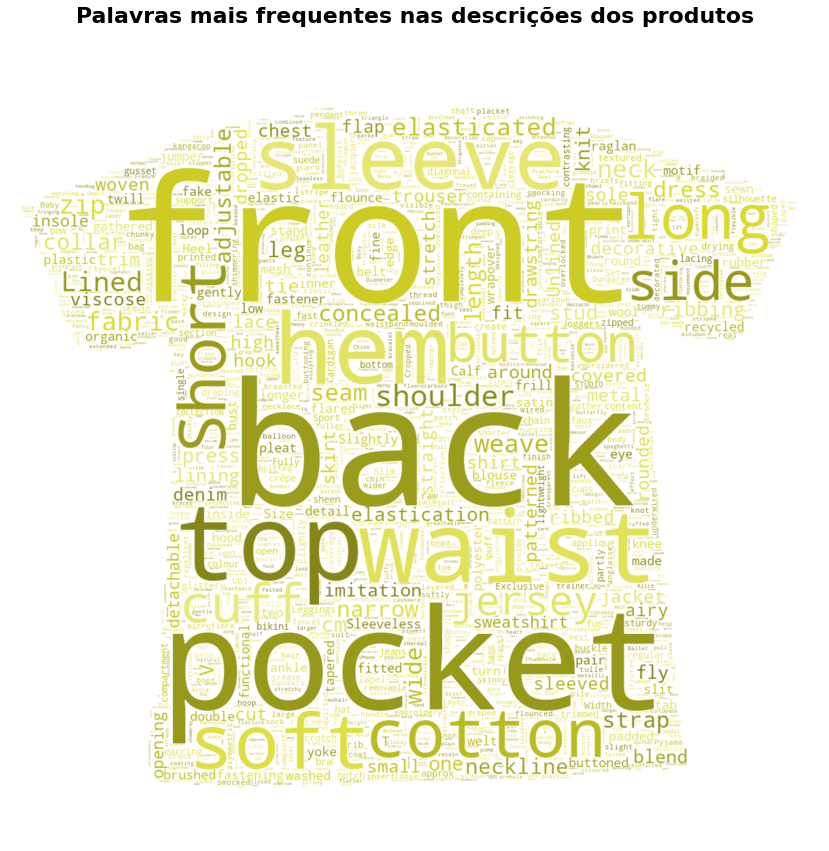

In [ ]:
# Get descriptions and convert them to a string
text = df_articles["detail_desc"].unique()
text = " ".join(text)

# Get the mask - the form of the wordcloud
mask = np.array(Image.open('drive/MyDrive/MECAI/MAI5017/images/t-shirt.jpg'))

# Create wordcloud object
wc = WordCloud(background_color="white", max_words=2000,
              stopwords=set(STOPWORDS), max_font_size=256,
              random_state=42, collocations=False,
              mask=mask, width=mask.shape[1], height=mask.shape[0],
              color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("Palavras mais frequentes nas descrições dos produtos", size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])

df_transactions['dayofyear'] = df_transactions['t_dat'].dt.dayofyear

df_transactions['estacao'] = 'Inverno'
df_transactions.loc[(df_transactions['dayofyear'] >= 80) & (df_transactions['dayofyear'] < 172), 'estacao'] = 'Primavera'
df_transactions.loc[(df_transactions['dayofyear'] >= 172) & (df_transactions['dayofyear'] < 264), 'estacao'] = 'Verão'
df_transactions.loc[(df_transactions['dayofyear'] >= 264) & (df_transactions['dayofyear'] < 355), 'estacao'] = 'Outono'

In [ ]:
df_transactions_filtered = df_transactions.loc[(df_transactions['t_dat'].dt.year==2019)]

In [ ]:
df_transactions_verao = df_transactions_filtered.loc[df_transactions_filtered['estacao']=='Verão']
df_transactions_primavera = df_transactions_filtered.loc[df_transactions_filtered['estacao']=='Primavera']
df_transactions_outono = df_transactions_filtered.loc[df_transactions_filtered['estacao']=='Outono']
df_transactions_inverno = df_transactions_filtered.loc[df_transactions_filtered['estacao']=='Inverno']

In [ ]:
df_best_seller_verao = df_transactions_verao.groupby(['article_id'])['customer_id'].count().reset_index().sort_values(by=['customer_id'], ascending=False).head(100).rename(columns={'customer_id':'qtt_purchases'})
df_best_seller_primavera = df_transactions_primavera.groupby(['article_id'])['customer_id'].count().reset_index().sort_values(by=['customer_id'], ascending=False).head(100).rename(columns={'customer_id':'qtt_purchases'})
df_best_seller_outono = df_transactions_outono.groupby(['article_id'])['customer_id'].count().reset_index().sort_values(by=['customer_id'], ascending=False).head(100).rename(columns={'customer_id':'qtt_purchases'})
df_best_seller_inverno = df_transactions_inverno.groupby(['article_id'])['customer_id'].count().reset_index().sort_values(by=['customer_id'], ascending=False).head(100).rename(columns={'customer_id':'qtt_purchases'})

In [ ]:
df_best_seller_verao = df_best_seller_verao.merge(df_articles[['article_id', 'detail_desc']], how='left', on='article_id')
df_best_seller_primavera = df_best_seller_primavera.merge(df_articles[['article_id', 'detail_desc']], how='left', on='article_id')
df_best_seller_outono = df_best_seller_outono.merge(df_articles[['article_id', 'detail_desc']], how='left', on='article_id')
df_best_seller_inverno = df_best_seller_inverno.merge(df_articles[['article_id', 'detail_desc']], how='left', on='article_id')

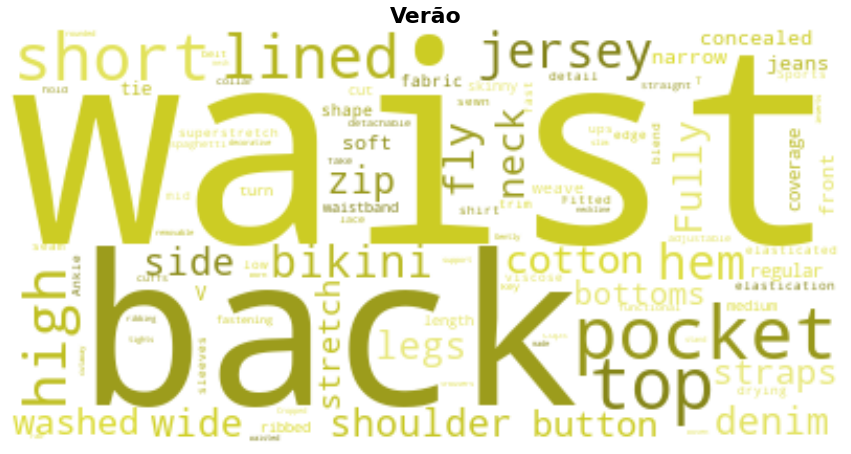

In [ ]:
# Get descriptions and convert them to a string
text = df_best_seller_verao["detail_desc"].unique()
text = " ".join(text)

# Create wordcloud object
wc = WordCloud(background_color="white", max_words=2000,
              stopwords=set(STOPWORDS), max_font_size=256,
              random_state=42, collocations=False,
              color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("Verão", size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

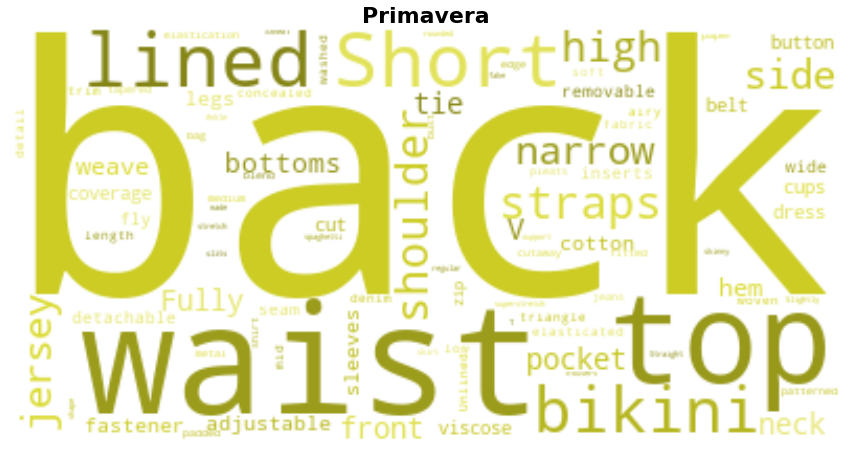

In [ ]:
# Get descriptions and convert them to a string
text = df_best_seller_primavera["detail_desc"].unique()
text = " ".join(text)

# Create wordcloud object
wc = WordCloud(background_color="white", max_words=2000,
              stopwords=set(STOPWORDS), max_font_size=256,
              random_state=42, collocations=False,
              color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("Primavera", size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

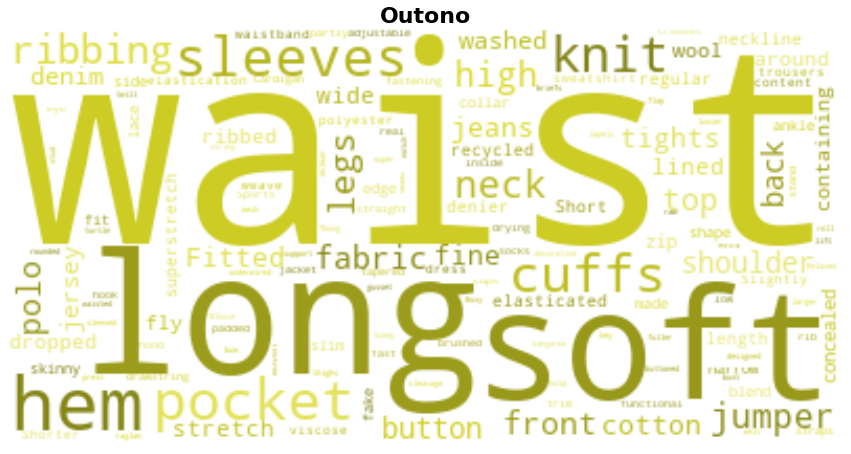

In [ ]:
# Get descriptions and convert them to a string
text = df_best_seller_outono["detail_desc"].unique()
text = " ".join(text)

# Create wordcloud object
wc = WordCloud(background_color="white", max_words=2000,
              stopwords=set(STOPWORDS), max_font_size=256,
              random_state=42, collocations=False,
              color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("Outono", size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

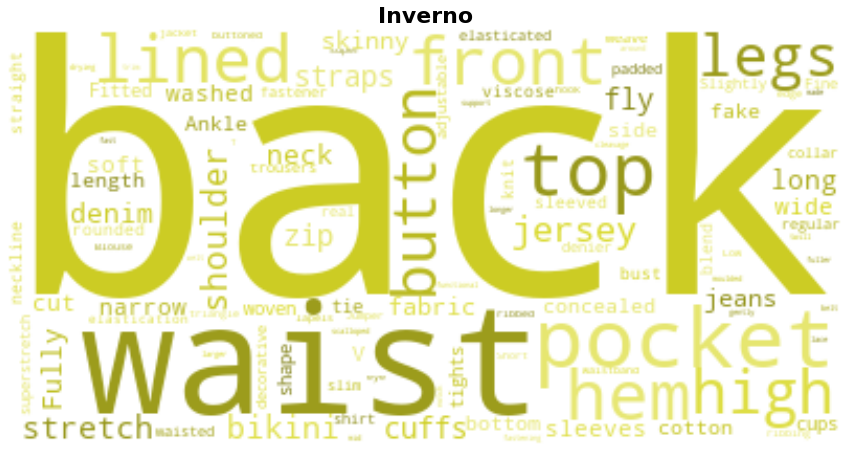

In [ ]:
# Get descriptions and convert them to a string
text = df_best_seller_inverno["detail_desc"].unique()
text = " ".join(text)

# Create wordcloud object
wc = WordCloud(background_color="white", max_words=2000,
              stopwords=set(STOPWORDS), max_font_size=256,
              random_state=42, collocations=False,
              color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("Inverno", size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
word_frequency_dicts = []

dates_array = df_transactions['t_dat'].unique()[:2]

for date in dates_array:
  df_transactions_date = df_transactions.loc[df_transactions['t_dat']==date]

  # Get descriptions and convert them to a string
  text = df_transactions_date["detail_desc"]
  text = " ".join(text)

  # Get the mask - the form of the wordcloud
  # mask = np.array(Image.open('../input/hm-fashion-recommender-dataset/pics/mask.jpg'))

  # Create wordcloud object
  wc = WordCloud(background_color="white", max_words=2000,
                stopwords=STOPWORDS, max_font_size=256,
                random_state=42,
                color_func=similar_color_func)
  wc.generate(text)

  word_frequency_dicts.append(wc.words_)

TypeError: ignored

In [ ]:
for i in range(len(word_frequency_dicts)-1):
  dict_bf = word_frequency_dicts[i]
  dict_af = word_frequency_dicts[i+1]

  for step in range(1, 10 + 1):
    dict_diff = {k:dict_af.get(k, 0) - dict_bf.get(k, 0) for k in set(list(dict_af.keys()) + list(dict_bf.keys()))}

    wc_step = {k_i: v_i / 10 for k_i, v_i in dict_diff.items()}

    wc_frequency = {k:dict_bf.get(k, 0) + step*wc_step.get(k, 0) for k in set(list(dict_diff.keys()) + list(wc_step.keys()))}

    wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42,
               color_func=similar_color_func).generate_from_frequencies(wc_frequency)

    # Plot
    fig = plt.figure(figsize=(15, 15))
    plt.title("- Most Common Words found within Article Descriptions -",
              size=22, weight="bold")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    # plt.savefig(f'/content/drive/MyDrive/MECAI/MAI5017/images/image{step}.jpeg')
    # plt.show()

In [ ]:
# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("- Most Common Words found within Article Descriptions -",
          size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Total Number of unique Article Descriptions: 43405 



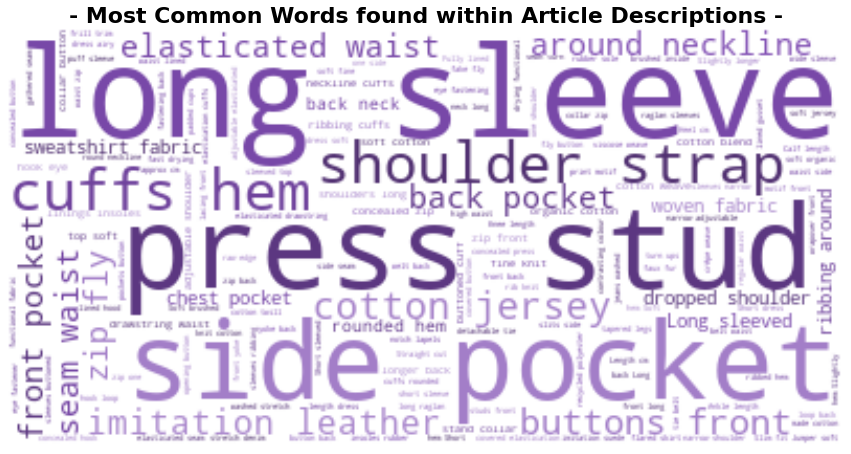

In [ ]:
print(clr.S+"Total Number of unique Article Descriptions:"+clr.E, df_articles["detail_desc"].nunique(), "\n")

# Get descriptions and convert them to a string
text = df_articles["detail_desc"].unique()
text = " ".join(text)

# Get the mask - the form of the wordcloud
# mask = np.array(Image.open('../input/hm-fashion-recommender-dataset/pics/mask.jpg'))

# Create wordcloud object
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42,
               color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("- Most Common Words found within Article Descriptions -",
           size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
teste = wc.words_

In [ ]:
wc2 = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42,
               color_func=similar_color_func).generate_from_frequencies(teste)

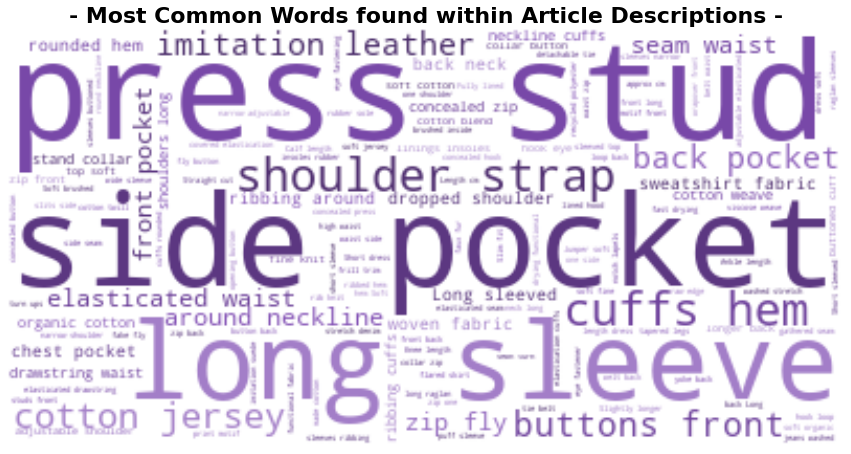

In [ ]:
# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("- Most Common Words found within Article Descriptions -",
           size=22, weight="bold")
plt.imshow(wc2, interpolation="bilinear")
plt.axis('off')
plt.savefig('/content/drive/MyDrive/MECAI/MAI5017/images/teste.jpeg')
plt.show()

# Parallel coordinates

In [ ]:
df_articles['index_group_name'].unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

In [ ]:
df_articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 
'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name']]

article_id               prod_name product_type_name  \
0        108775015               Strap top          Vest top   
1        108775044               Strap top          Vest top   
2        108775051           Strap top (1)          Vest top   
3        110065001       OP T-shirt (Idro)               Bra   
4        110065002       OP T-shirt (Idro)               Bra   
...            ...                     ...               ...   
105537   953450001  5pk regular Placement1             Socks   
105538   953763001       SPORT Malaga tank          Vest top   
105539   956217002         Cartwheel dress             Dress   
105540   957375001        CLAIRE HAIR CLAW         Hair clip   
105541   959461001            Lounge dress             Dress   

        product_group_name graphical_appearance_name colour_group_name  \
0       Garment Upper body                     Solid             Black   
1       Garment Upper body                     Solid             White   
2       Garment Upper body                    Stripe         Off White   
3                Underwear                     Solid             Black   
4                Underwear                     Solid             White   
...                    ...                       ...               ...   
105537      Socks & Tights           Placement print             Black   
105538  Garment Upper body                     Solid             Black   
105539   Garment Full body                     Solid             Black   
105540         Accessories                     Solid             Black   
105541   Garment Full body                     Solid         Off White   

       perceived_colour_value_name perceived_colour_master_name  \
0                             Dark                        Black   
1                            Light                        White   
2                      Dusty Light                        White   
3                             Dark                        Black   
4                            Light                        White   
...                            ...                          ...   
105537                        Dark                        Black   
105538                        Dark                        Black   
105539                        Dark                        Black   
105540                        Dark                        Black   
105541                 Dusty Light                        White   

          department_name        index_name index_group_name  \
0            Jersey Basic        Ladieswear       Ladieswear   
1            Jersey Basic        Ladieswear       Ladieswear   
2            Jersey Basic        Ladieswear       Ladieswear   
3          Clean Lingerie  Lingeries/Tights       Ladieswear   
4          Clean Lingerie  Lingeries/Tights       Ladieswear   
...                   ...               ...              ...   
105537          Socks Bin          Menswear         Menswear   
105538             Jersey        Ladieswear       Ladieswear   
105539             Jersey        Ladieswear       Ladieswear   
105540  Small Accessories           Divided          Divided   
105541             Jersey        Ladieswear       Ladieswear   

                  section_name garment_group_name  
0       Womens Everyday Basics       Jersey Basic  
1       Womens Everyday Basics       Jersey Basic  
2       Womens Everyday Basics       Jersey Basic  
3              Womens Lingerie  Under-, Nightwear  
4              Womens Lingerie  Under-, Nightwear  
...                        ...                ...  
105537           Men Underwear   Socks and Tights  
105538                    H&M+       Jersey Fancy  
105539            Womens Trend       Jersey Fancy  
105540     Divided Accessories        Accessories  
105541            Womens Trend       Jersey Fancy  

[105542 rows x 13 columns]

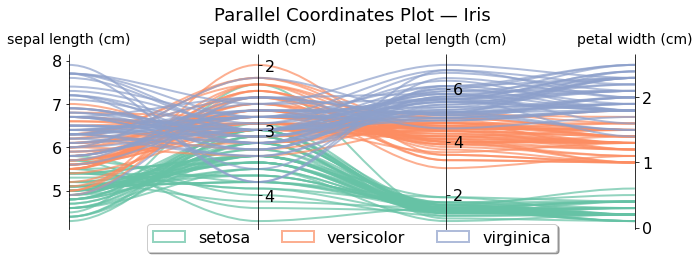

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
ynames = iris.feature_names
ys = iris.data
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05

ymaxs[1], ymins[1] = ymins[1], ymaxs[1]  # reverse axis 1 to have less crossings
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

fig, host = plt.subplots(figsize=(10,4))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot — Iris', fontsize=18, pad=12)

colors = plt.cm.Set2.colors
legend_handles = [None for _ in iris.target_names]
for j in range(ys.shape[0]):
    # create bezier curves
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=2, alpha=0.7, edgecolor=colors[iris.target[j]])
    legend_handles[iris.target[j]] = patch
    host.add_patch(patch)
host.legend(legend_handles, iris.target_names,
            loc='lower center', bbox_to_anchor=(0.5, -0.18),
            ncol=len(iris.target_names), fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
df_tr_cus = df_transactions.merge(df_customers[['customer_id' ,'age']], how='left', on='customer_id')

In [ ]:
df_tr_cus.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'age'],
      dtype='object')

In [ ]:
df_cus_carac = df_tr_cus.groupby(['customer_id', 'age']).agg({'price':'sum', 'article_id':'nunique', 't_dat':'nunique', 'sales_channel_id':'count'}).reset_index()

In [ ]:
df_age_carac = df_cus_carac.groupby(['age']).agg({'price':'median', 'article_id':'median', 't_dat':'median', 'sales_channel_id':'median'}).reset_index()

In [ ]:
df_age_carac.rename(columns={'article_id': 'qtt_products', 't_dat': 'qtt_days', 'sales_channel_id': 'qtt_purchases'}, inplace=True)

In [ ]:
df_age_carac.describe()

age      price  qtt_products   qtt_days  qtt_purchases
count  84.000000  84.000000     84.000000  84.000000      84.000000
mean   57.500000   0.207081      6.666667   2.351190       7.660714
std    24.392622   0.102669      3.325996   0.911043       4.035356
min    16.000000   0.047424      2.000000   1.000000       2.000000
25%    36.750000   0.125871      4.000000   2.000000       4.000000
50%    57.500000   0.204992      6.500000   2.000000       7.000000
75%    78.250000   0.266824      9.000000   3.000000      10.000000
max    99.000000   0.738678     20.000000   5.000000      26.500000

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

fig = go.Figure(data=
    go.Parcoords(
        # line = dict(color = df['colorVal'],
        #            colorscale = 'Electric',
        #            showscale = True,
        #            cmin = -4000,
        #            cmax = -100),
        dimensions = list([
            dict(range = [0,0.8],
                #  constraintrange = [100000,150000],
                 label = "Price", values = df_age_carac['price']),
            dict(range = [0,20],
                 label = 'Amount products', values = df_age_carac['qtt_products']),
            dict(range = [0,5],
                 label = 'Amount days', values = df_age_carac['qtt_days']),
            dict(range = [0,27],
                 label = 'Amount purchases', values = df_age_carac['qtt_purchases']),
            # dict(range = [-1,4],
            #      tickvals = [0,1,2,3],
            #      label = 'Block Material', values = df['blockMaterial']),
            # dict(range = [134,3154],
            #      visible = True,
            #      label = 'Total Weight', values = df['totalWeight']),
        ])
)
)
fig.show()

In [ ]:
colors = {
  '0 - 19': tuple(ti/255 for ti in (128,0,0)),
  '20 - 39': tuple(ti/255 for ti in (46,46,46)),
  '40 - 59': tuple(ti/255 for ti in (237,217,126)),
  '60+': tuple(ti/255 for ti in (138,163,178)),
}
# Amarelo: (254,217,52) rgb(237,217,126)
# Preto: (15,15,15) rgb(54,67,103)
# Cinza: (46,46,46)
# Branco: (255,255,255)
# Azul: (54,67,103) rgb(138,163,178)

groups = {
  '0 - 19': 0,
  '20 - 39': 1,
  '40 - 59': 2,
  '60+': 3,
}

In [ ]:
df_age_carac['faixa_etaria'] = '60+'
df_age_carac.loc[df_age_carac['age'] < 20, 'faixa_etaria'] = '0 - 19'
df_age_carac.loc[(df_age_carac['age'] >= 20) & (df_age_carac['age'] < 40), 'faixa_etaria'] = '20 - 39'
df_age_carac.loc[(df_age_carac['age'] >= 40) & (df_age_carac['age'] < 60), 'faixa_etaria'] = '40 - 59'

In [ ]:
df_age_carac.columns

Index(['age', 'price', 'qtt_products', 'qtt_days', 'qtt_purchases',
       'faixa_etaria'],
      dtype='object')

In [ ]:
df_age_carac = df_age_carac.loc[df_age_carac['qtt_products'] != df_age_carac['qtt_products'].max()]

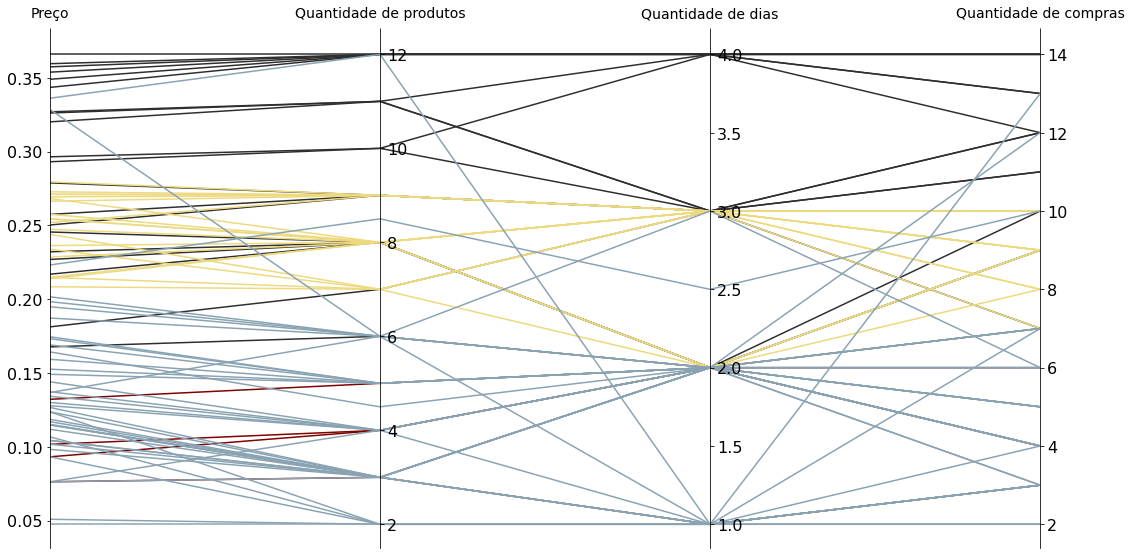

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

fig, host = plt.subplots()
fig.set_size_inches(16, 8)

# create some dummy data
ynames = ['Preço', 'Quantidade de produtos', 'Quantidade de dias', 'Quantidade de compras'] 

# organize the data
ys = df_age_carac[['price', 'qtt_products', 'qtt_days', 'qtt_purchases']].to_numpy()
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
# host.set_title('Parallel Coordinates Plot', fontsize=18)

legend_handles = [None for _ in df_age_carac['faixa_etaria'].unique()]

for j in range(df_age_carac.shape[0]):
    host.plot(range(ys.shape[1]), zs[j,:], c=colors[df_age_carac.iloc[j]['faixa_etaria']])
    # verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
    # codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    # path = Path(verts, codes)
    # patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=colors[df_age_carac.iloc[j]['faixa_etaria']])
    # legend_handles[groups[df_age_carac.iloc[j]['faixa_etaria']]] = patch
    # host.add_patch(patch)
# host.legend(legend_handles, groups.keys(),
#             loc='lower center', bbox_to_anchor=(0.5, -0.18),
#             ncol=df_age_carac['faixa_etaria'].nunique(), fancybox=True, shadow=True,
#             title='Faixa etária')
plt.tight_layout()
plt.show()

In [ ]:
df_age_carac.tail(60)

age     price  qtt_products  qtt_days  qtt_purchases faixa_etaria
23  39.0  0.216881           8.0       2.0            9.0      20 - 39
24  40.0  0.214805           8.0       2.0            9.0      40 - 59
25  41.0  0.208407           7.0       2.0            8.0      40 - 59
26  42.0  0.213890           8.0       2.0            9.0      40 - 59
27  43.0  0.228551           8.0       2.0            9.0      40 - 59
28  44.0  0.236305           8.0       3.0            9.0      40 - 59
29  45.0  0.247314           8.0       3.0           10.0      40 - 59
30  46.0  0.251915           9.0       3.0           10.0      40 - 59
31  47.0  0.254610           8.0       3.0           10.0      40 - 59
32  48.0  0.266364           9.0       3.0           10.0      40 - 59
33  49.0  0.269305           9.0       3.0           10.0      40 - 59
34  50.0  0.271068           9.0       3.0           10.0      40 - 59
35  51.0  0.271085           9.0       3.0           10.0      40 - 59
36  52.0  0.279475           9.0       3.0           10.0      40 - 59
37  53.0  0.272729           9.0       3.0           10.0      40 - 59
38  54.0  0.268203           8.0       3.0            9.0      40 - 59
39  55.0  0.257458           8.0       3.0            9.0      40 - 59
40  56.0  0.254280           8.0       3.0            9.0      40 - 59
41  57.0  0.243932           7.0       3.0            8.0      40 - 59
42  58.0  0.233797           7.0       3.0            8.0      40 - 59
43  59.0  0.214712           7.0       3.0            7.0      40 - 59
44  60.0  0.201576           6.0       2.0            7.0          60+
45  61.0  0.194831           6.0       2.0            7.0          60+
46  62.0  0.187186           6.0       2.0            6.0          60+
47  63.0  0.174492           5.0       2.0            6.0          60+
48  64.0  0.173220           5.0       2.0            6.0          60+
49  65.0  0.159237           5.0       2.0            5.0          60+
50  66.0  0.152525           5.0       2.0            5.0          60+
51  67.0  0.149085           5.0       2.0            5.0          60+
52  68.0  0.144000           4.0       2.0            5.0          60+
53  69.0  0.137220           4.0       2.0            5.0          60+
54  70.0  0.134186           4.0       2.0            4.0          60+
55  71.0  0.127788           4.0       2.0            4.0          60+
56  72.0  0.123678           3.0       2.0            4.0          60+
57  73.0  0.129983           4.0       2.0            4.0          60+
58  74.0  0.114763           3.0       2.0            4.0          60+
59  75.0  0.118576           3.0       2.0            4.0          60+
60  76.0  0.126602           3.0       2.0            4.0          60+
61  77.0  0.104322           3.0       1.0            3.0          60+
62  78.0  0.115186           3.0       2.0            4.0          60+
63  79.0  0.101678           3.0       1.0            3.0          60+
64  80.0  0.111814           3.0       2.0            3.0          60+
65  81.0  0.116983           3.0       2.0            3.0          60+
66  82.0  0.104195           3.0       1.0            3.0          60+
67  83.0  0.114771           3.0       2.0            4.0          60+
68  84.0  0.098203           3.0       1.0            3.0          60+
69  85.0  0.106695           2.0       1.0            3.0          60+
70  86.0  0.050831           2.0       1.0            2.0          60+
71  87.0  0.076237           3.0       1.0            3.0          60+
72  88.0  0.164254           4.5       2.0            5.0          60+
73  89.0  0.123661           2.0       1.0            3.0          60+
74  90.0  0.093169           2.0       1.0            3.0          60+
75  91.0  0.168992           5.0       2.0            7.0          60+
76  92.0  0.198288           6.0       1.0            7.0          60+
78  94.0  0.336136          12.0       1.0           13.0          60+
79  95.0  0.223153           

# Scatter Plot

In [ ]:
my_colors = ["#AF0848", "#E90B60", "#CB2170", "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]

In [ ]:
df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])

In [ ]:
df_transactions = df_transactions.merge(df_articles[['article_id', 'product_group_name']], how='left', on='article_id')

In [ ]:
df_transactions['dayofyear'] = df_transactions['t_dat'].dt.dayofyear

In [ ]:
df_transactions['estacao'] = 'Inverno'
df_transactions.loc[(df_transactions['dayofyear'] >= 80) & (df_transactions['dayofyear'] < 172), 'estacao'] = 'Primavera'
df_transactions.loc[(df_transactions['dayofyear'] >= 172) & (df_transactions['dayofyear'] < 264), 'estacao'] = 'Verão'
df_transactions.loc[(df_transactions['dayofyear'] >= 264) & (df_transactions['dayofyear'] < 355), 'estacao'] = 'Outono'

In [ ]:
df_qtt_purchases = df_transactions.groupby(['customer_id', 'estacao', 'product_group_name'])['t_dat'].nunique().reset_index()

In [ ]:
df_avg_qtt_purchases = df_qtt_purchases.groupby(['estacao', 'product_group_name'])['t_dat'].mean().reset_index()

In [ ]:
df_product_purchase['animation_frame'] = 1
df_product_purchase.loc[df_product_purchase['estacao']=='Primavera', 'animation_frame'] = 2
df_product_purchase.loc[df_product_purchase['estacao']=='Outono', 'animation_frame'] = 3
df_product_purchase.loc[df_product_purchase['estacao']=='Inverno', 'animation_frame'] = 4

In [ ]:
df_product_purchase = df_transactions.groupby(['product_group_name', 'estacao']).agg({'t_dat':'count', 'price': 'sum'}).reset_index()

In [ ]:
df_product_purchase.rename(columns={'t_dat': 'Quantidade de compras', 'price': 'Vendas ($)'}, inplace=True)

In [ ]:
df_avg_qtt_purchases.rename(columns={'t_dat':'avg_qtt_purchases'}, inplace=True)

In [ ]:
df_product_purchase = df_product_purchase.merge(df_avg_qtt_purchases, how='left', on=['product_group_name', 'estacao']) 

In [ ]:
df_product_purchase['avg_qtt_purchases']=(df_product_purchase['avg_qtt_purchases']-df_product_purchase['avg_qtt_purchases'].min())/(df_product_purchase['avg_qtt_purchases'].max()-df_product_purchase['avg_qtt_purchases'].min())

In [ ]:
df_product_purchase['avg_qtt_purchases'] = 1

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
fig = px.scatter(df_product_purchase, x="Vendas ($)", y="Quantidade de compras", animation_frame="animation_frame", animation_group="product_group_name",
           size="avg_qtt_purchases", color="product_group_name", hover_name="product_group_name",
           log_x=True, log_y=True, size_max=30, range_x=[1,200000], range_y=[1,10000000])

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000

iplot(fig)

In [ ]:
px.scatter(data, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="country", hover_name="country",
           log_x=True, size_max=100, range_x=[200,50000], range_y=[25,90])

In [ ]:
df_transactions_filtered = df_transactions.loc[df_transactions['product_group_name']=='Swimwear']

In [ ]:
df_transactions_grouped = df_transactions.groupby([]).agg({'article_id':'count', 'price': 'sum'}).reset_index()

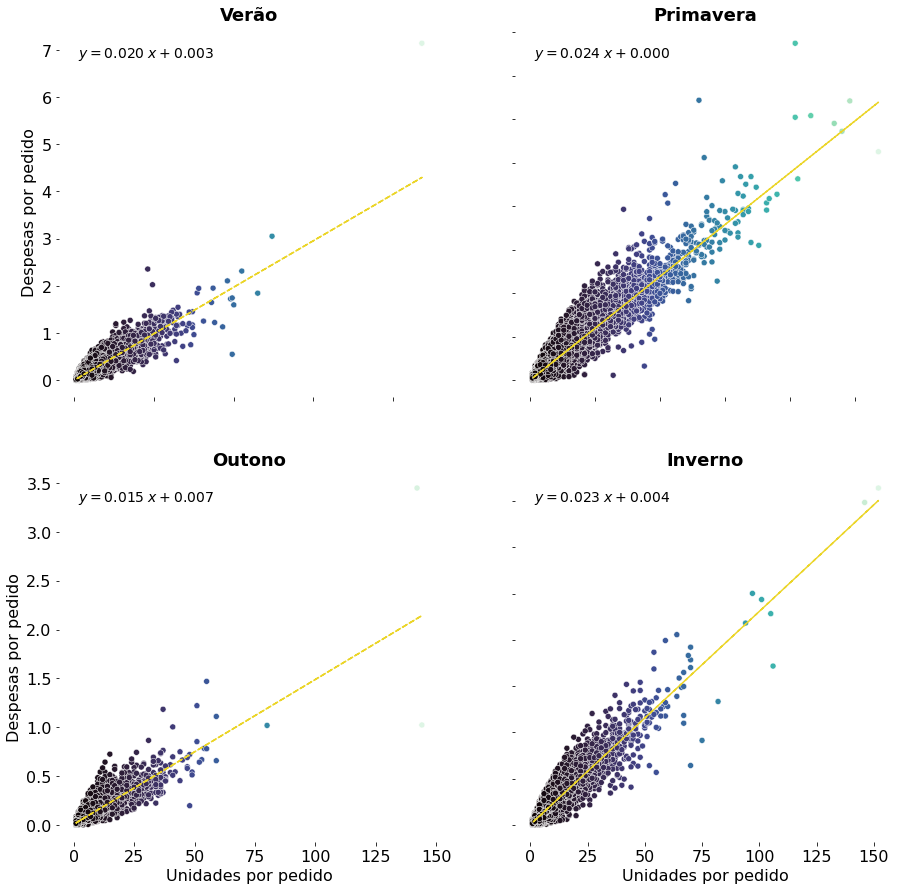

In [ ]:
# Data
df_grouped = df_transactions_filtered.groupby(["customer_id", "estacao"]).agg({'article_id':'count', 'price': 'sum'}).reset_index()
df_grouped.columns = ["customer_id", "estacao", "units", "order_price"]
from scipy import stats

fig, axs = plt.subplots(2,2, figsize=(15, 15))

for estacao in df_transactions_filtered['estacao'].unique():
  if estacao == 'Verão':
    ax1 = 0
    ax2 = 0
  elif estacao == 'Primavera':
    ax1 = 0
    ax2 = 1
  elif estacao == 'Outono':
    ax1 = 1
    ax2 = 0
  else:
    ax1 = 1
    ax2 = 1
  df = df_grouped.loc[df_grouped['estacao']==estacao]
  # df = df[(np.abs(stats.zscore(df[['units', 'order_price']])) < 3).all(axis=1)]
  # Plot
  
  sns.scatterplot(data=df, x="units", y="order_price", hue="units", palette="mako", legend=None, ax=axs[ax1, ax2])
  axs[ax1, ax2].set_title("Unidades x Preço", size=18, weight="bold")
  axs[ax1, ax2].set_ylabel("Despesas por pedido")
  axs[ax1, ax2].set_xlabel("Unidades por pedido")
  axs[ax1, ax2].title.set_text(estacao)

  my_colors = ["#000000", "#696969", "#DCDCDC", "#EBD529","#EBE823", "#EBE97C", "#EBE9B2", "#FFFFFF"]

  z = np.polyfit(df['units'], df['order_price'], 1)
  p = np.poly1d(z)
  axs[ax1, ax2].plot(df['units'], p(df['units']), linestyle="--", color=my_colors[3])

  text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
  axs[ax1, ax2].gca().text(0.05, 0.95, text,transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

  sns.despine(left=True, bottom=True)
  
for ax in axs.flat:
  ax.label_outer()

# RFV

In [ ]:
periods = [[2018, 10], 
           [2018, 11], 
           [2018, 12], 
           [2019, 1], 
           [2019, 2], 
           [2019, 3], 
           [2019, 4],
           [2019, 5], 
           [2019, 6], 
           [2019, 7], 
           [2019, 8], 
           [2019, 9],
           [2019, 10],
           [2019, 11],
           [2019, 12],
           [2020, 1], 
           [2020, 2], 
           [2020, 3], 
           [2020, 4],
           [2020, 5], 
           [2020, 6], 
           [2020, 7], 
           [2020, 8], 
           ]

In [ ]:
list_dfs = []

for i in range(len(periods)-1):
  print(i)
  df_transactions_filtered = df_transactions.loc[((df_transactions['t_dat'].dt.year==periods[i][0]) & (df_transactions['t_dat'].dt.month==periods[i][1]))
  | ((df_transactions['t_dat'].dt.year==periods[i+1][0]) & (df_transactions['t_dat'].dt.month==periods[i+1][1]))]

  df_rfv = df_transactions_filtered.groupby(['customer_id'])['price'].sum().reset_index().rename(columns={'price':'valor'})

  df_transactions_filtered['max_date_in_period'] = df_transactions_filtered['t_dat'].max()

  df_rfv_recency = df_transactions_filtered.groupby(['customer_id', 'max_date_in_period'])['t_dat'].max().reset_index().rename(columns={'t_dat':'last_purchase_date'})

  df_rfv_recency['recencia'] = (df_rfv_recency['max_date_in_period'] - df_rfv_recency['last_purchase_date']).dt.days

  df_rfv = df_rfv.merge(df_rfv_recency[['customer_id', 'recencia']], how='left', on='customer_id')
  del df_rfv_recency

  df_transactions_filtered['qtt_days'] = df_transactions_filtered['t_dat'].nunique()

  df_rfv_frequency = df_transactions_filtered.groupby(['customer_id', 'qtt_days'])['t_dat'].nunique().reset_index().rename(columns={'t_dat':'qtt_purchases'})

  df_rfv_frequency['frequencia'] = df_rfv_frequency['qtt_days']/df_rfv_frequency['qtt_purchases']

  df_rfv = df_rfv.merge(df_rfv_frequency[['customer_id', 'frequencia']], how='left', on='customer_id')
  del df_rfv_frequency

  df_rfv_qtt_prod = df_transactions_filtered.groupby(['customer_id'])['article_id'].nunique().reset_index().rename(columns={'article_id':'qtt_products'})
  df_rfv = df_rfv.merge(df_rfv_qtt_prod[['customer_id', 'qtt_products']], how='left', on='customer_id')
  del df_rfv_qtt_prod

  df_rfv = df_rfv.merge(df_customers[['customer_id', 'age']], how='left', on='customer_id')

  df_rfv['faixa_etaria'] = '60+'
  df_rfv.loc[df_rfv['age'] < 20, 'faixa_etaria'] = '0 - 19'
  df_rfv.loc[(df_rfv['age'] >= 20) & (df_rfv['age'] < 40), 'faixa_etaria'] = '20 - 39'
  df_rfv.loc[(df_rfv['age'] >= 40) & (df_rfv['age'] < 60), 'faixa_etaria'] = '40 - 59'

  df_rfv = df_rfv.groupby(['faixa_etaria']).agg({'valor': 'median', 'recencia':'median', 'frequencia': 'mean', 'qtt_products': 'median'}).reset_index()
  df_rfv['period'] = f'{periods[i][0]}-{periods[i][1]}'

  df_rfv['frequencia_normalizada']=(df_rfv['frequencia']-df_rfv['frequencia'].min())/(df_rfv['frequencia'].max()-df_rfv['frequencia'].min())

  list_dfs.append(df_rfv)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
df = pd.concat(list_dfs)
del list_dfs

In [ ]:
df['qtt_products'].unique()

array([2., 4., 3., 5.])

In [ ]:
px.scatter(df, x="valor", y="frequencia", animation_frame="period", animation_group="faixa_etaria",
           size="qtt_products", color="faixa_etaria", hover_name="faixa_etaria",
           log_x=False, size_max=75, range_y=[40, 55], range_x=[0,0.15])

In [ ]:
df_transactions['year'] = df_transactions['t_dat'].dt.year
df_transactions['month'] = df_transactions['t_dat'].dt.month

df_prod_sales = df_transactions.groupby(['year', 'month', 'article_id'])['price'].sum().reset_index().rename(columns={'price': 'total_sold'})

In [ ]:
df_prod_sales.sort_values(by=['article_id', 'year', 'month'], inplace=True)

In [ ]:
df_prod_sales['prev_price'] = df_prod_sales.groupby(['article_id'])['total_sold'].shift(1)

In [ ]:
df_prod_sales['diff_sales'] = df_prod_sales['total_sold'] - df_prod_sales['prev_price']

In [ ]:
df_prod_sales['diff'] = -1
df_prod_sales.loc[df_prod_sales['diff_sales']>0, 'diff'] = 1

In [ ]:
df_prod_growth = df_prod_sales.groupby(['article_id'])['diff'].sum().reset_index()

In [ ]:
df_prod_growth.sort_values(by=['diff'])

article_id  diff
45522   683662005   -16
47357   688873002   -16
46038   685347001   -16
16748   571436011   -15
13610   559129008   -15
...           ...   ...
56421   714026001     7
15966   568597007     7
16830   571706001     7
6021    501722004     8
15981   568601007     9

[104547 rows x 2 columns]

In [ ]:
df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])

In [ ]:
list_dfs = []

for i in range(len(periods)-1):
  print(i)
  df_transactions_filtered = df_transactions.loc[(((df_transactions['t_dat'].dt.year==periods[i][0]) & (df_transactions['t_dat'].dt.month==periods[i][1]))
  | ((df_transactions['t_dat'].dt.year==periods[i+1][0]) & (df_transactions['t_dat'].dt.month==periods[i+1][1]))) & (df_transactions['article_id']==683662005)]

  df_rfv = df_transactions_filtered.groupby(['customer_id'])['price'].sum().reset_index().rename(columns={'price':'valor'})

  df_rfv_qtt_prod = df_transactions_filtered.groupby(['customer_id'])['t_dat'].count().reset_index().rename(columns={'t_dat':'qtt_purchases'})
  df_rfv = df_rfv.merge(df_rfv_qtt_prod[['customer_id', 'qtt_purchases']], how='left', on='customer_id')
  del df_rfv_qtt_prod

  df_rfv = df_rfv.merge(df_customers[['customer_id', 'age']], how='left', on='customer_id')

  df_rfv['faixa_etaria'] = '60+'
  df_rfv.loc[df_rfv['age'] < 20, 'faixa_etaria'] = '0 - 19'
  df_rfv.loc[(df_rfv['age'] >= 20) & (df_rfv['age'] < 40), 'faixa_etaria'] = '20 - 39'
  df_rfv.loc[(df_rfv['age'] >= 40) & (df_rfv['age'] < 60), 'faixa_etaria'] = '40 - 59'

  df_rfv = df_rfv.groupby(['faixa_etaria']).agg({'valor': 'median', 'qtt_purchases': 'median'}).reset_index()
  df_rfv['period'] = f'{periods[i][0]}-{periods[i][1]}'

  list_dfs.append(df_rfv)

df = pd.concat(list_dfs)
del list_dfs

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [ ]:
df = pd.concat(list_dfs)
del list_dfs

In [ ]:
df['size'] = 50

In [ ]:
df['valor'].max()

0.0135423728813559

In [ ]:
df['valor'].min()

0.0067627118644067

In [ ]:
df['qtt_purchases'].max()

2.0

In [ ]:
df['qtt_purchases'].min()

1.0

In [ ]:
px.scatter(df, x="valor", y="qtt_purchases", animation_frame="period", animation_group="faixa_etaria",
           size="size", color="faixa_etaria", hover_name="faixa_etaria",
           log_x=False, size_max=75, range_y=[0, 3], range_x=[0,0.015])